In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model # Functional API
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
# Building our Model To train the data

In [ ]:
# Working with pre trained model
base_model=MobileNet(input_shape=(224,224,3), include_top=False) # weights

for layer in base_model.layers: # To prevent retraining of the model!
  layer.trainable=False # every layer trainablety is false

x=Flatten()(base_model.output)
x=Dense(units=7, activation='softmax')(x)

# creating our model
model=Model(base_model.input,x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# all the layers of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
# Preparing our data using data generator

In [ ]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train_data=train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/Emotion Detection using OpenCV & Python/train",
                                             target_size=(224,224),
                                             batch_size=32,)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_data=val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/Emotion Detection using OpenCV & Python/train",
                                         target_size=(224,224),
                                         batch_size=32)

Found 350 images belonging to 7 classes.


In [ ]:
# visualizaing the data that is fed to train data gen

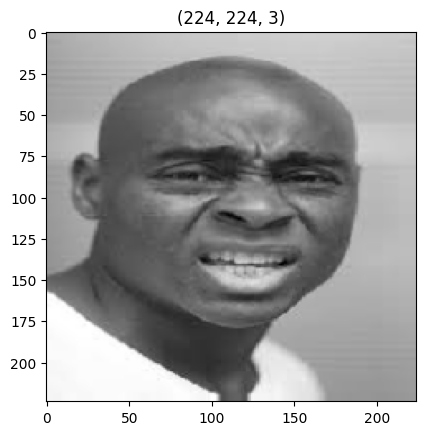

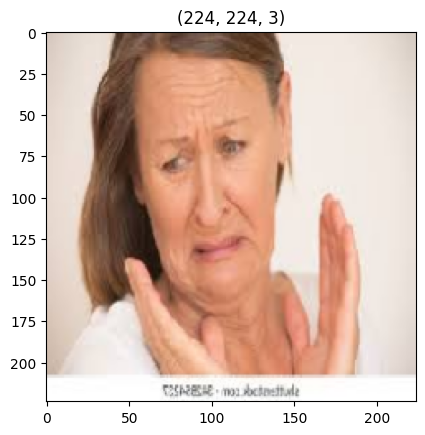

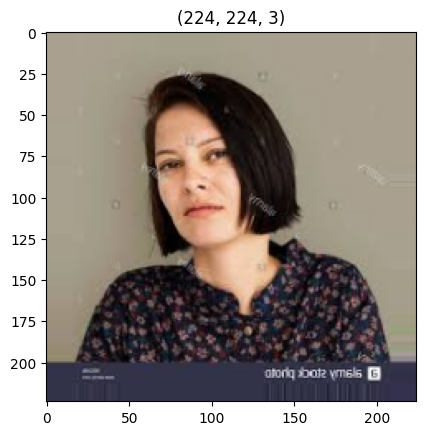

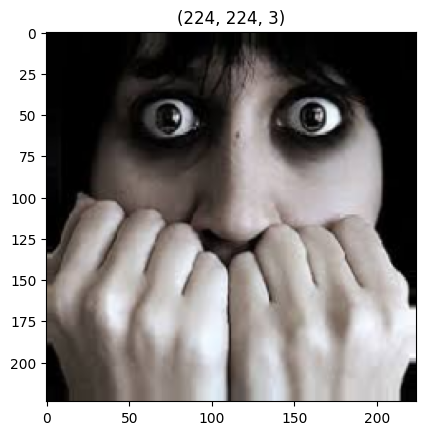

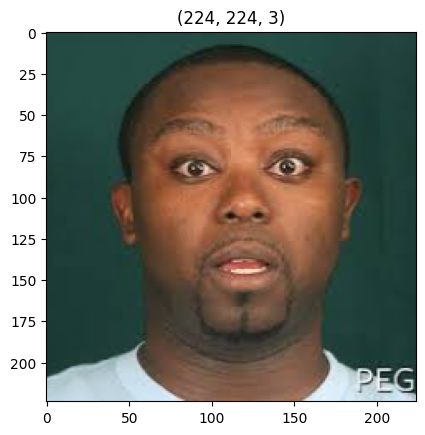

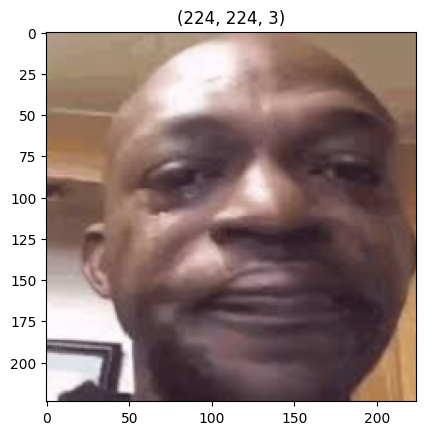

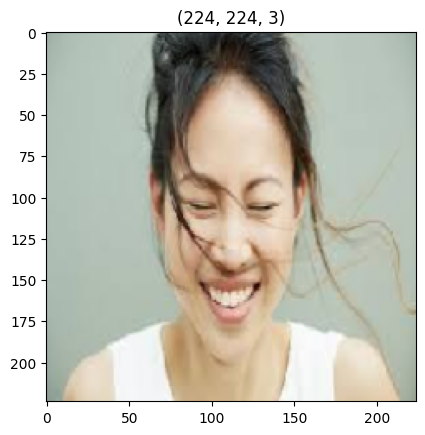

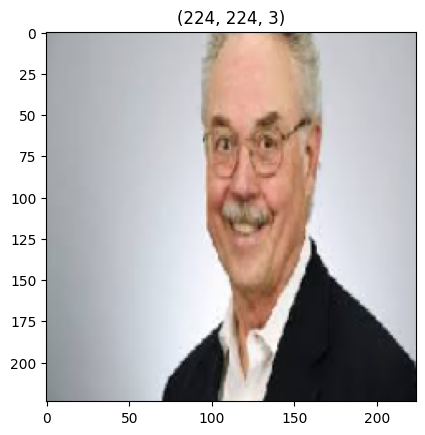

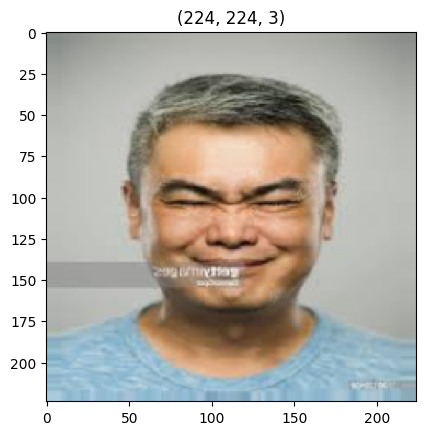

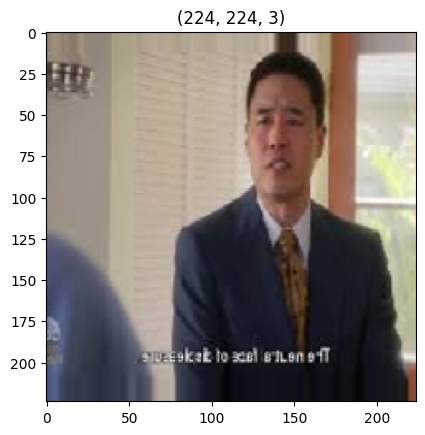

In [ ]:
# to visualize the images in the traing data denerator
t_img, label=train_data.next()
#-------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input :- images array
  output :- plots the images
  """
  count=0
  for im, l in zip(img_arr, label):
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis=False
    plt.show()

    count+=1
    if count==10:
      break
#--------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

In [ ]:
# having early stopping and model check point

In [ ]:
## having early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# model check point
mc=ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# puting call back in a list
call_back=[es,mc]

In [19]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=10,
                         epochs=30,
                         validation_data=val_data,
                         validation_steps=8,
                         callbacks=[es,mc])

<ipython-input-19-946ae87e46cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 7.7546 - accuracy: 0.2358
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to best_model.h5
10/10 [==============================] - 79s 7s/step - loss: 7.7546 - accuracy: 0.2358 - val_loss: 4.2728 - val_accuracy: 0.4844


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 3.3238 - accuracy: 0.6038
Epoch 2: val_accuracy improved from 0.48438 to 0.83594, saving model to best_model.h5
10/10 [==============================] - 26s 3s/step - loss: 3.3238 - accuracy: 0.6038 - val_loss: 0.9821 - val_accuracy: 0.8359
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.2866 - accuracy: 0.7516
Epoch 3: val_accuracy improved from 0.83594 to 0.88672, saving model to best_model.h5
10/10 [==============================] - 37s 4s/step - loss: 1.2866 - accuracy: 0.7516 - val_loss: 0.4747 - val_accuracy: 0.8867
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.7465 - accuracy: 0.8396
Epoch 4: val_accuracy improved from 0.88672 to 0.89062, saving model to best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 0.7465 - accuracy: 0.8396 - val_loss: 0.4247 - val_accuracy: 0.8906
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.664

In [20]:
# Loading the best fit model
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Emotion Detection using OpenCV & Python/best_model.h5")

In [21]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

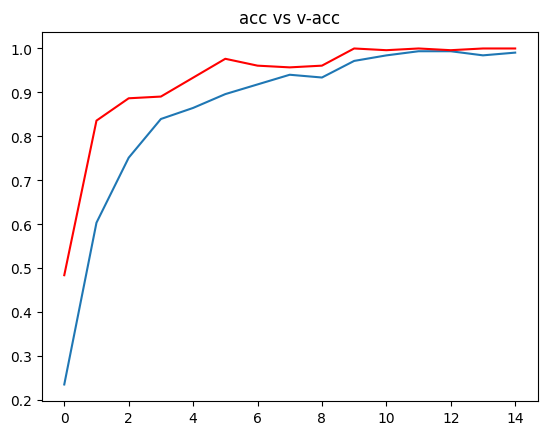

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

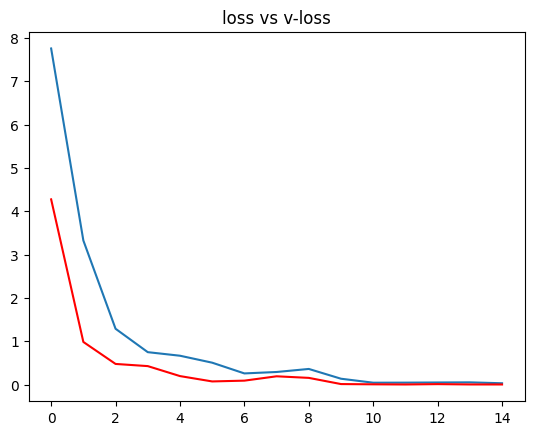

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [25]:
# just to map o/p values
op=dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
# path for the image to see if it predics corret class
path="/content/drive/MyDrive/Colab Notebooks/Emotion Detection using OpenCV & Python/test2.jpeg" # add the image path
img=load_img(path, target_size=(224,224))

i=img_to_array(img)/255
input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))
print(f"the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()